In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
car=pd.read_csv('car data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
car.shape

(301, 9)

In [40]:
car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [41]:
car.dropna(inplace=True)

In [42]:
car.duplicated().sum()

np.int64(2)

In [43]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [44]:
for col in car.columns:
    print("unique values of " + col + " is")
    print(car[col].unique())   # call the method with ()
    print("============================================")


unique values of Car_Name is
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Ave

In [45]:
def get_brand_name(car_name):
  car_name=car_name.split(' ')[0]
  return car_name.strip( ' ')

In [46]:
get_brand_name('Bajaj Pulsar RS200')

'Bajaj'

In [47]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [48]:
car['Car_Name']=car['Car_Name'].apply(get_brand_name)

In [49]:
car['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [50]:
X=car.drop('Selling_Price',axis=1)
y=car['Selling_Price']

In [51]:
categorical_cols = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
numeric_cols = ['Year', 'Present_Price', 'Kms_Driven']


In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [53]:
from math import remainder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_transformer=OneHotEncoder(handle_unknown='ignore')
preprocessor=ColumnTransformer(transformers=[('cat',categorical_transformer,categorical_cols)],remainder='passthrough')
# Suppose preprocessor is your ColumnTransformer object fitted on training data
preprocessor.fit(X_train)  # fit first
cat_encoder = preprocessor.named_transformers_['cat']
print(cat_encoder.categories_)


[array(['800', 'Activa', 'Bajaj', 'Hero', 'Honda', 'Hyosung', 'KTM',
       'Mahindra', 'Royal', 'Suzuki', 'TVS', 'Yamaha', 'alto', 'amaze',
       'baleno', 'brio', 'camry', 'ciaz', 'city', 'corolla', 'creta',
       'dzire', 'elantra', 'eon', 'ertiga', 'etios', 'fortuner', 'grand',
       'i10', 'i20', 'ignis', 'innova', 'jazz', 'land', 'omni', 'ritz',
       'swift', 'sx4', 'verna', 'wagon', 'xcent'], dtype=object), array(['CNG', 'Diesel', 'Petrol'], dtype=object), array(['Dealer', 'Individual'], dtype=object), array(['Automatic', 'Manual'], dtype=object), array([0, 1, 3])]


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import joblib
import pandas as pd

# Replace 'your_filename.csv' with the exact name of the file you uploaded
df = pd.read_csv('car data.csv')

# Check first few rows
df.head()


# Step 1: Load your dataset
# Replace 'car data.csv' with the correct path to your CSV file.
df = pd.read_csv("car data.csv")

# Step 2: Define features and target
# Assuming your dataset has a column named 'Selling_Price' as target.
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

# Step 3: Define feature lists (modify based on your dataset columns)
numerical_features = ['Year', 'Present_Price', 'Kms_Driven', 'Owner']
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Car_Name']

# Step 4: Create the preprocessor
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define the model pipelines
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Step 7: Train the Linear Regression Model
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
r2_lr = metrics.r2_score(y_test, y_pred_lr)
print("Linear Regression R2 Score:", r2_lr)

# Step 8: Train the Random Forest Model
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
r2_rf = metrics.r2_score(y_test, y_pred_rf)
print("Random Forest R2 Score:", r2_rf)

# Step 9: Select the best model based on R2 score
if r2_lr > r2_rf:
    best_model = pipe_lr
    print("Best Model Selected: Linear Regression")
else:
    best_model = pipe_rf
    print("Best Model Selected: Random Forest Regression")

# Step 10: Save the best model
joblib.dump(best_model, 'best_car_price_model.pkl')
print("Model saved successfully!")


Linear Regression R2 Score: 0.9007113320345539
Random Forest R2 Score: 0.9663694212962407
Best Model Selected: Random Forest Regression
Model saved successfully!


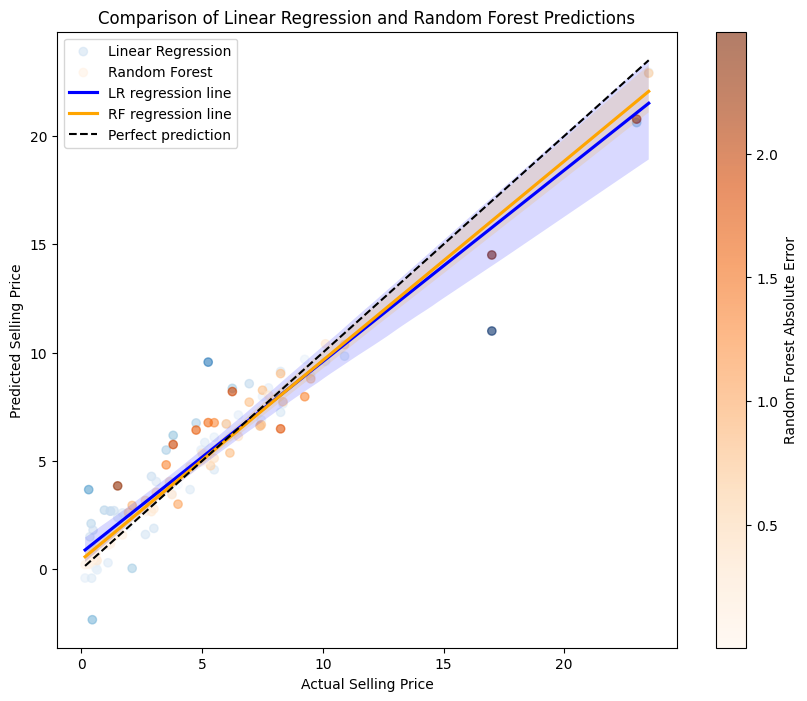

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict with both models
y_pred_lr = pipe_lr.predict(X_test)       # Linear Regression pipeline predictions
y_pred_rf = pipe_rf.predict(X_test)       # Random Forest pipeline predictions

# Calculate errors for coloring
errors_lr = np.abs(y_test - y_pred_lr)
errors_rf = np.abs(y_test - y_pred_rf)

plt.figure(figsize=(10, 8))

# Scatter plot for Linear Regression predictions
scatter_lr = plt.scatter(y_test, y_pred_lr, c=errors_lr, cmap='Blues', alpha=0.6, label='Linear Regression')

# Scatter plot for Random Forest predictions
scatter_rf = plt.scatter(y_test, y_pred_rf, c=errors_rf, cmap='Oranges', alpha=0.6, label='Random Forest')

# Regression lines (using seaborn regplot with scatter=False)
sns.regplot(x=y_test, y=y_pred_lr, scatter=False, color='blue', label='LR regression line')
sns.regplot(x=y_test, y=y_pred_rf, scatter=False, color='orange', label='RF regression line')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect prediction')

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Comparison of Linear Regression and Random Forest Predictions")
plt.legend()
plt.colorbar(scatter_rf, label='Random Forest Absolute Error')  # Show colorbar for RF errors (or create two if you want)
plt.show()


In [56]:
import os
print(os.getcwd())


/content


In [57]:
!pwd
!ls -l


/content
total 1948
-rw-r--r-- 1 root root 1969994 Jun 10 14:42  best_car_price_model.pkl
-rw-r--r-- 1 root root   17209 Jun 10 13:38 'car data.csv'
drwxr-xr-x 1 root root    4096 Jun  5 13:38  sample_data


In [58]:
print(preprocessor.transformers_[0][2])  # shows the categorical columns used
print(X_train.columns)  # shows all columns used in training


['Year', 'Present_Price', 'Kms_Driven', 'Owner']
Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [59]:
from google.colab import files
files.download('best_car_price_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>